# Group Assignment on Lead Scoring Case Study
**Submission by Vijay manchi, Vasushree Vinit Deshpande and Vishal Garg (DS C63)**

* **Problem Statement** :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

* **Goal**:
  The objective is to develop a logistic regression model that can identify "Hot Leads" and generate a Lead Score (calculated as the probability value * 100). This scoring system will assist the business in improving its lead conversion rate.

**It is a Binary Classification Problem**

# Import libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the input data

In [2]:
# Import file
ls= pd.read_csv('Leads.csv')

In [3]:
# Setting Parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Check Shape of Data
ls.shape

(9240, 37)

In [5]:
# Glance on the data to know if the data and data headers were read corrected (A high level view)
# Review Head

ls.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
# Review Tail to know if the last line of data was read correctly
ls.tail(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9230,d11c15b7-8056-45a6-8954-771c0d0495fe,579701,Landing Page Submission,Google,No,No,0,2.0,870,2.00,Email Opened,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,NaN,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,No,Email Opened
9231,4aeae36b-2b57-494f-bdab-dd58844286b4,579697,Landing Page Submission,Google,No,No,1,8.0,1016,4.00,Email Opened,India,"Banking, Investment And Insurance",Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,No,Email Opened
9232,2d0109e9-dfb2-4664-83de-c2ea75ec7516,579642,Landing Page Submission,Direct Traffic,No,No,0,2.0,1770,2.00,SMS Sent,India,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,SMS Sent
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.60,SMS Sent,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,NaN,No,No,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [7]:
# check for null and datatype 
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Basic Statistics on numerical columns
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Remarks:
- Possible Outliers in TotalVisits, Time Spend on Website, Pages views Per visit
- Need further review

In [9]:
# Pull %age of missing data and sort in desceding order

mis_val = ls.isnull().sum()
mis_val_percent = 100 * ls.isnull().sum()/len(ls)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
print ("The Lead Scoring Dataframe has " + str(ls.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.\n")

#miss_data = 100*ls.isna().sum()/(ls.shape[0])
print(mis_val_percent[mis_val_percent.values>0].sort_values(ascending=False))

The Lead Scoring Dataframe has 37 columns.
There are 17 columns that have missing values.

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity           

Remarks: Drop columns with more than 25% Data missing

In [10]:
# Remove the columns with Data missing more than 25%

print("Removing "+str(len(mis_val_percent[mis_val_percent.values>25]))+" columns where more than 25% data missing")
columns_with_25_percentage_missing_data = mis_val_percent[mis_val_percent.values>25].sort_values(ascending=False)
columns_with_25_percentage_missing_data

Removing 10 columns where more than 25% data missing


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
dtype: float64

In [11]:
# Drop Column
print("Shape of Dataset Before dropping the column")
print(ls.shape)
ls.drop(labels = columns_with_25_percentage_missing_data.index, axis=1, inplace=True)
print("Shape of Dataset after dropping the column")
print(ls.shape)

Shape of Dataset Before dropping the column
(9240, 37)
Shape of Dataset after dropping the column
(9240, 27)


In [12]:
# Pull Missing Data Percentage and sort in desceding order

miss_data = 100*ls.isna().sum()/(ls.shape[0])
print(miss_data[miss_data.values>0].sort_values(ascending=False))


How did you hear about X Education    23.885281
Specialization                        15.562771
City                                  15.367965
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Lead Source                            0.389610
dtype: float64


In [13]:
print("Shape of Dataset Before dropping the null values")
print(ls.shape)
ls = ls.dropna(subset='TotalVisits')
ls = ls.dropna(subset='Page Views Per Visit')
ls = ls.dropna(subset='Last Activity')
ls = ls.dropna(subset='Lead Source')
print("Shape of Dataset after dropping the null values")
print(ls.shape)


Shape of Dataset Before dropping the null values
(9240, 27)
Shape of Dataset after dropping the null values
(9074, 27)


In [14]:
print("Summary view of column: How did you hear about X Education \n")
print(100*ls.groupby(["How did you hear about X Education"])["How did you hear about X Education"].value_counts().sort_values(ascending=False)/(ls.shape[0]))
print(" \n Summary view of column: Specialization \n")
print(100*ls.groupby(["Specialization"])["Specialization"].value_counts().sort_values(ascending=False)/(ls.shape[0]))
print(" \n Summary view of column: City \n")
100*ls.groupby(["City"])["City"].value_counts().sort_values(ascending=False)/(ls.shape[0])

Summary view of column: How did you hear about X Education 

How did you hear about X Education
Select                   53.846154
Online Search             8.904562
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Other                     2.049813
Multiple Sources          1.675116
Advertisements            0.771435
Social Media              0.727353
Email                     0.286533
SMS                       0.253471
Name: count, dtype: float64
 
 Summary view of column: Specialization 

Specialization
Select                               20.398942
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.2261

City
Mumbai                         35.012123
Select                         23.760194
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: count, dtype: float64

In [15]:
# Observed Select values which represent missinmg data. Hence needs to be replaced with NUlls
ls = ls.replace(['Select'], np.nan)

In [16]:
# Pull %age of missing data and sort in desceding order

miss_data = 100*ls.isna().sum()/(ls.shape[0])
miss_data[miss_data.values>0].sort_values(ascending=False)


How did you hear about X Education    78.091250
City                                  39.398281
Specialization                        36.169275
dtype: float64

In [17]:
# List of Columns which we need to drop
ls.drop(['How did you hear about X Education','City','Specialization'], axis=1, inplace=True)

In [18]:
print(ls.shape)

(9074, 24)


In [19]:
int_dtype_columns = [column for column in ls.columns if ls[column].dtype == 'int64']
print("Columns with integer Data type : \n\n",int_dtype_columns)

print('\n \n')
float_dtype_columns = [column for column in ls.columns if ls[column].dtype == 'float64']
print("Columns with float Data type : \n\n",float_dtype_columns)

print('\n \n')
object_dtype_columns = [column for column in ls.columns if ls[column].dtype == 'object']
print("Columns with object Data type : \n\n",object_dtype_columns)

Columns with integer Data type : 

 ['Lead Number', 'Converted', 'Total Time Spent on Website']

 

Columns with float Data type : 

 ['TotalVisits', 'Page Views Per Visit']

 

Columns with object Data type : 

 ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


# Univariate Analysis on the Object data

 Univariate Analysis for column :  Lead Origin


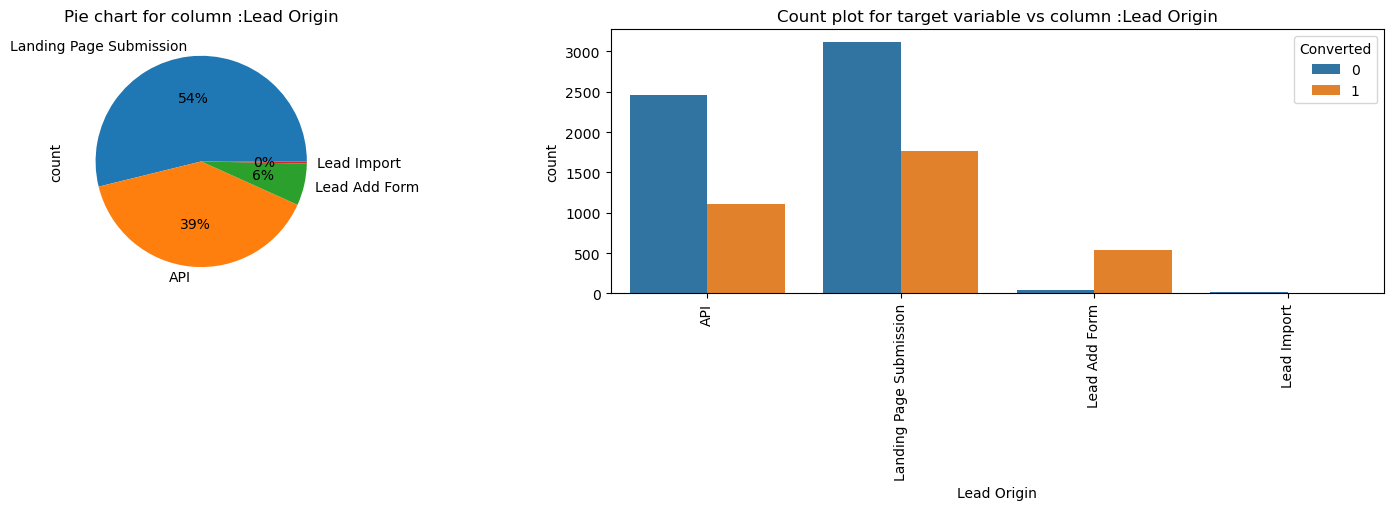

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Lead Source


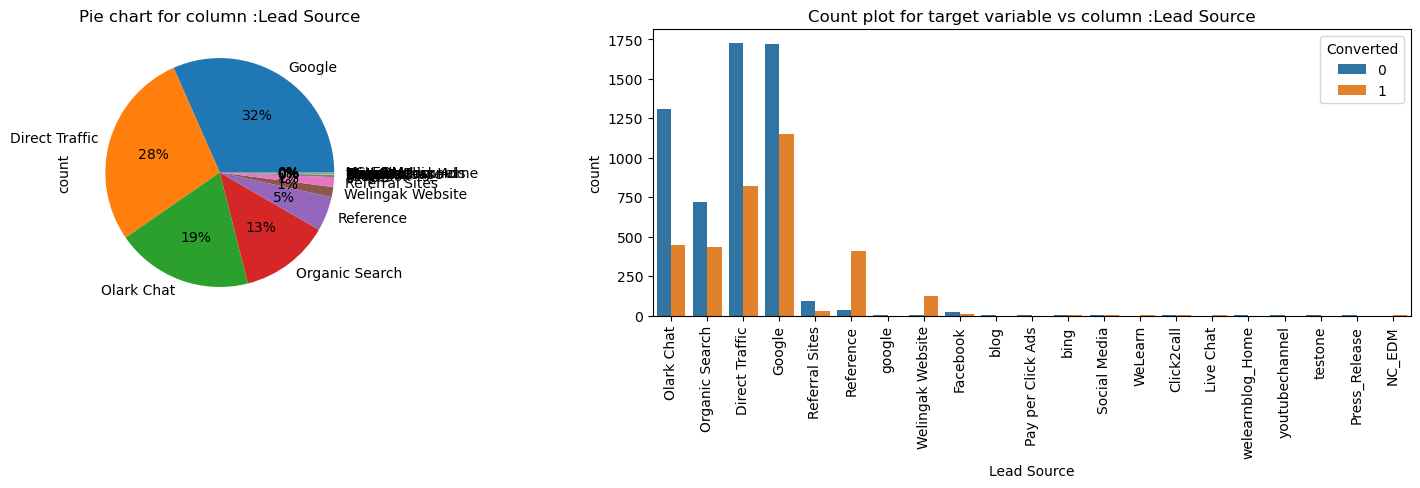

Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
WeLearn               0.011020
Pay per Click Ads     0.011020
NC_EDM                0.011020
blog                  0.011020
testone               0.011020
welearnblog_Home      0.011020
youtubechannel        0.011020
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Do Not Email


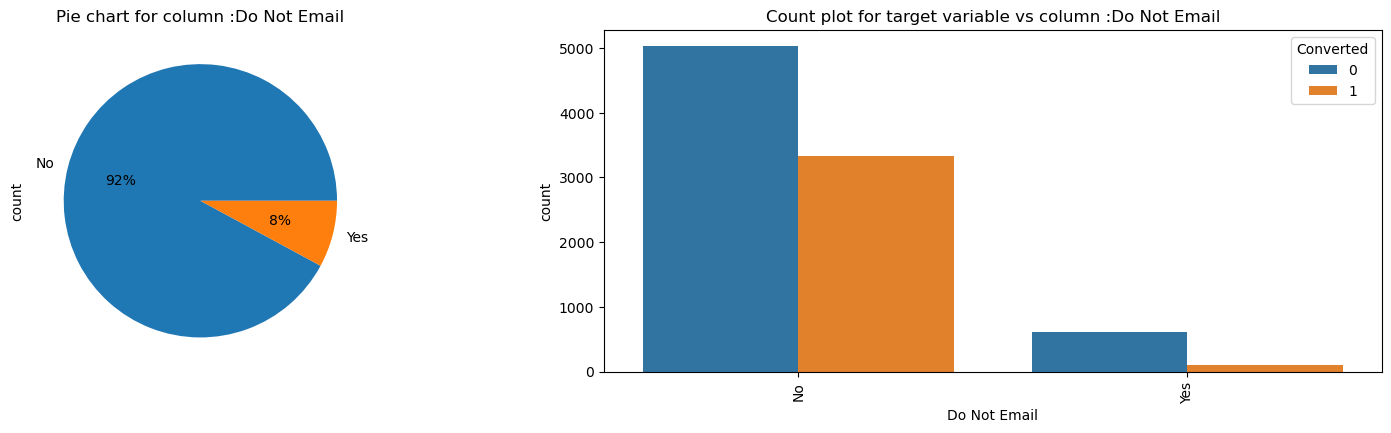

Do Not Email
No     92.109323
Yes     7.890677
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Do Not Call


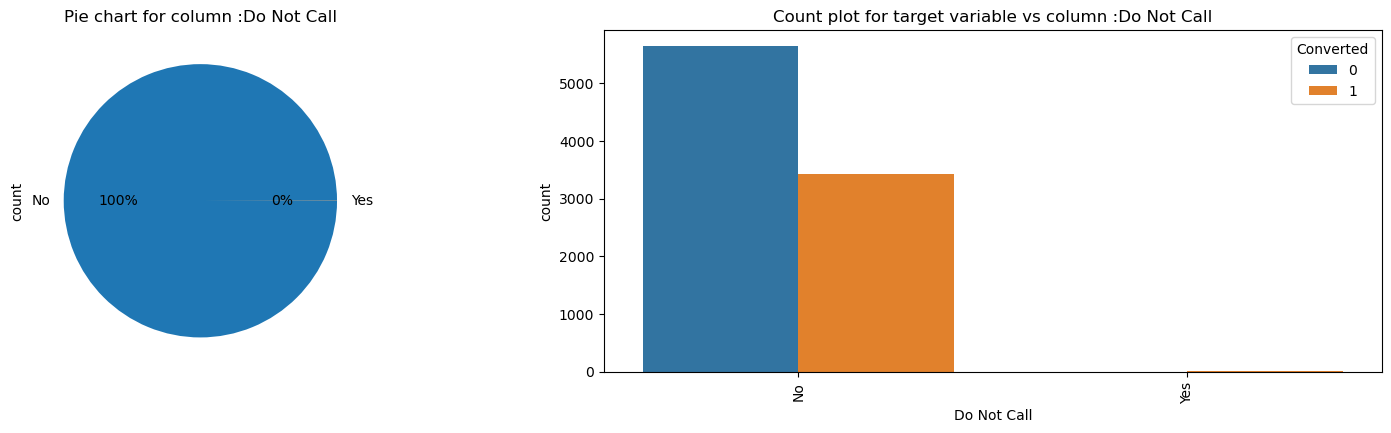

Do Not Call
No     99.977959
Yes     0.022041
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Last Activity


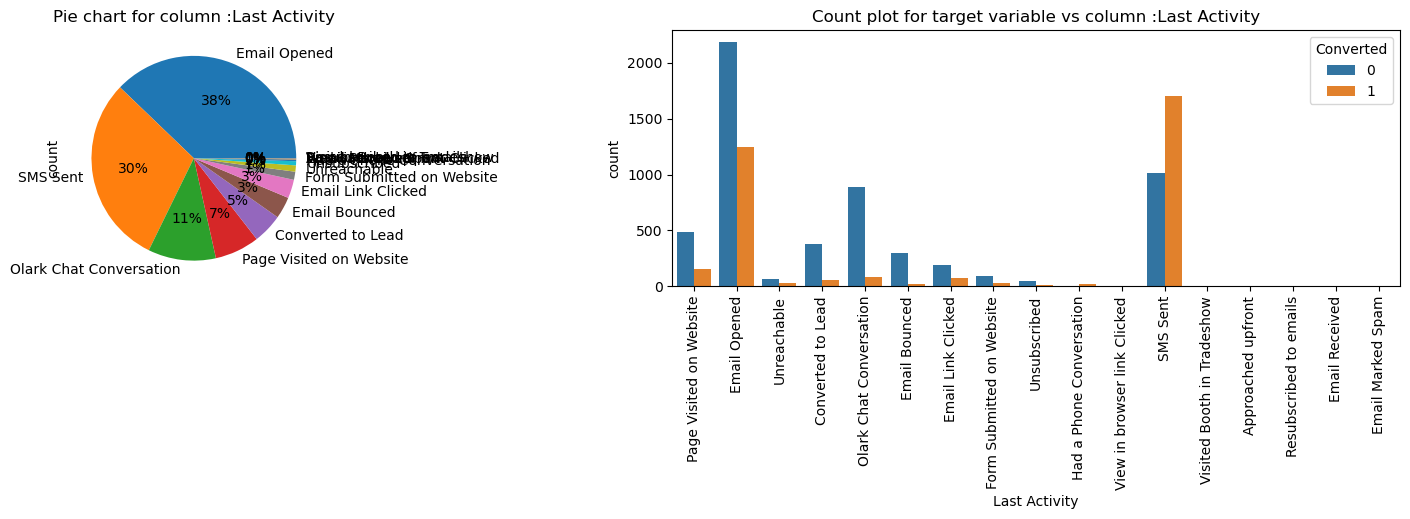

Last Activity
Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Search


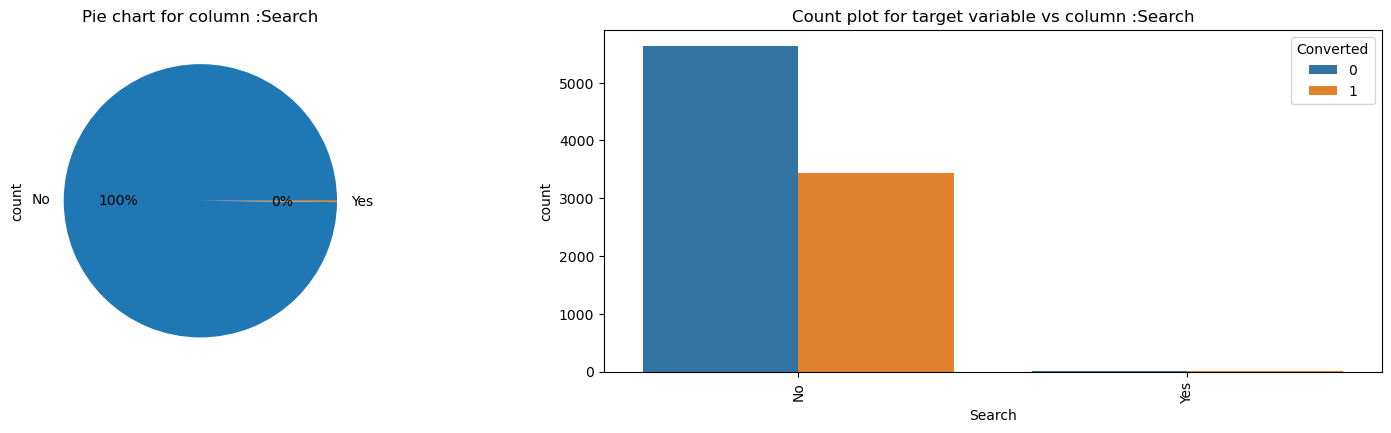

Search
No     99.845713
Yes     0.154287
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Magazine


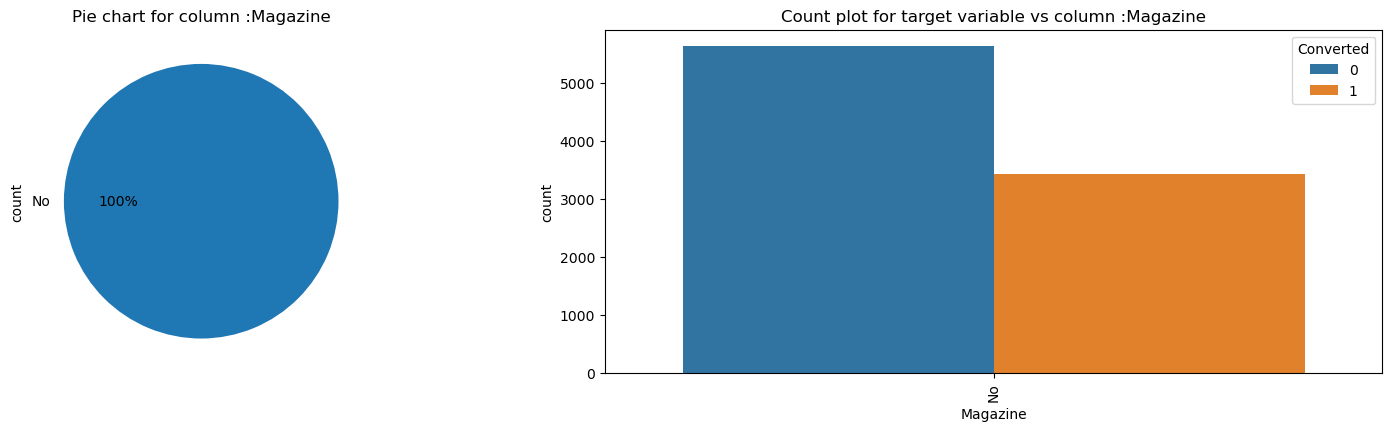

Magazine
No    100.0
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Newspaper Article


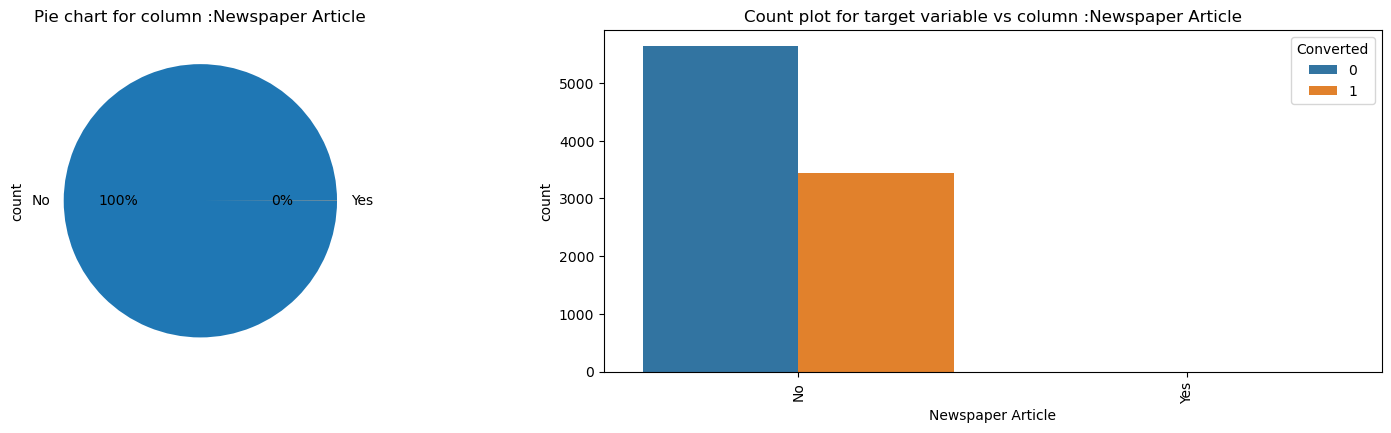

Newspaper Article
No     99.977959
Yes     0.022041
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  X Education Forums


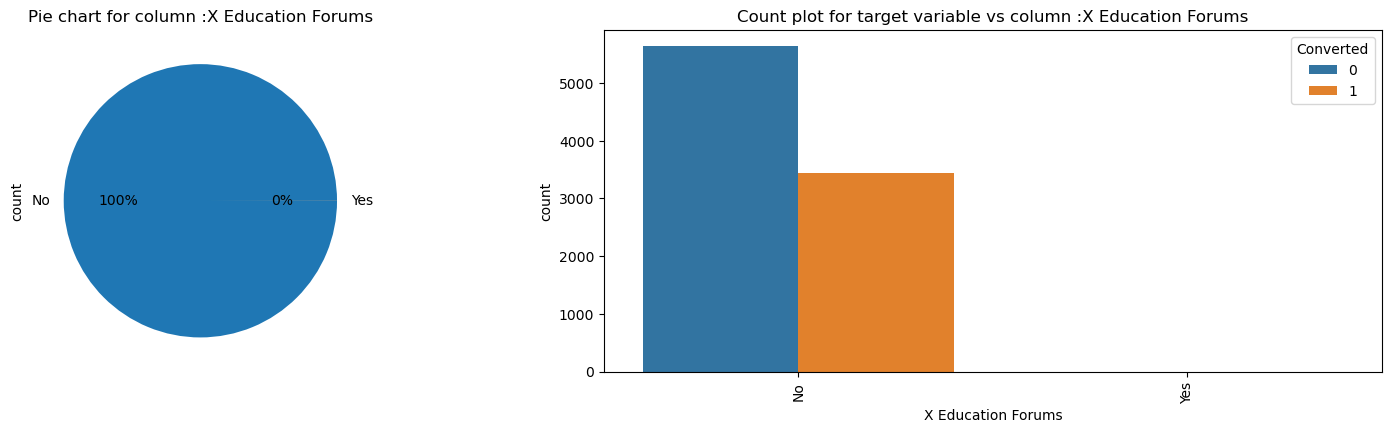

X Education Forums
No     99.98898
Yes     0.01102
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Newspaper


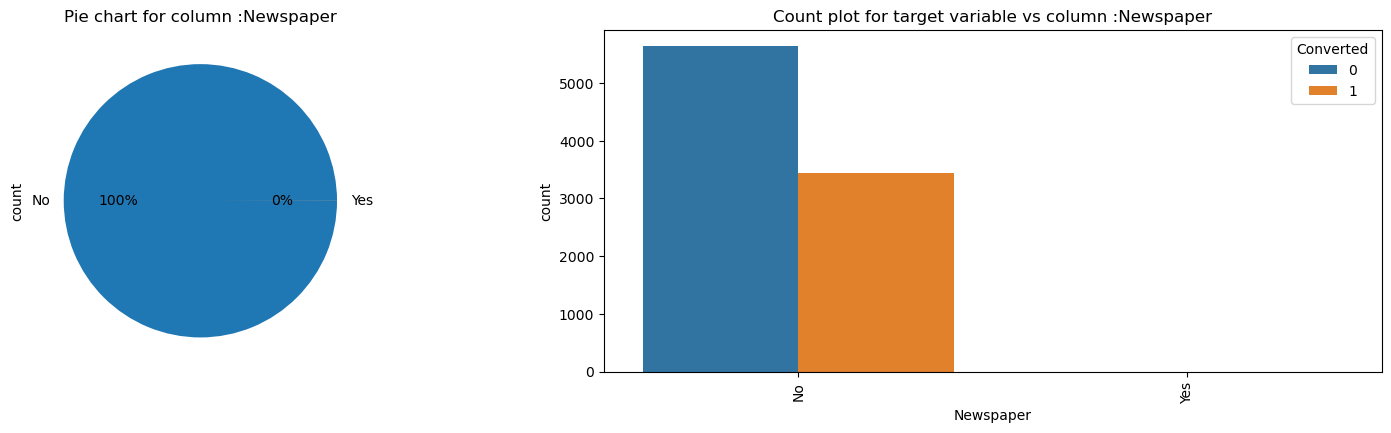

Newspaper
No     99.98898
Yes     0.01102
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Digital Advertisement


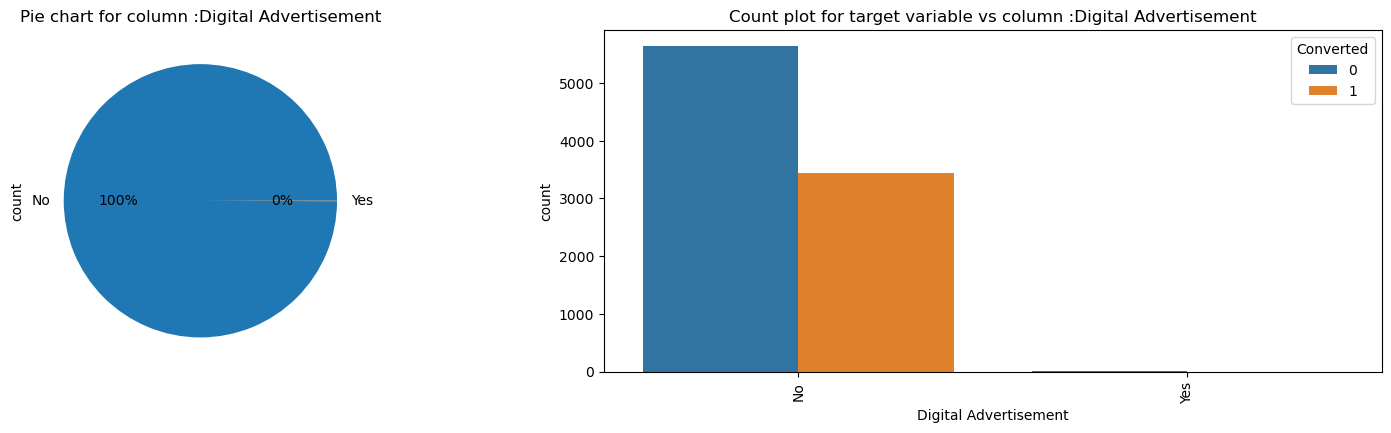

Digital Advertisement
No     99.955918
Yes     0.044082
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Through Recommendations


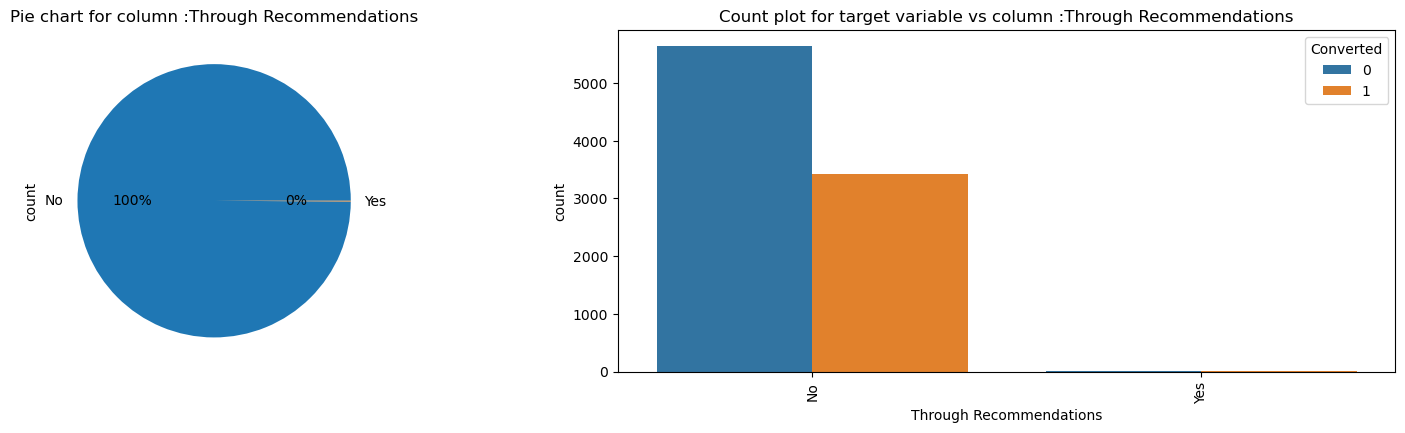

Through Recommendations
No     99.922857
Yes     0.077143
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Receive More Updates About Our Courses


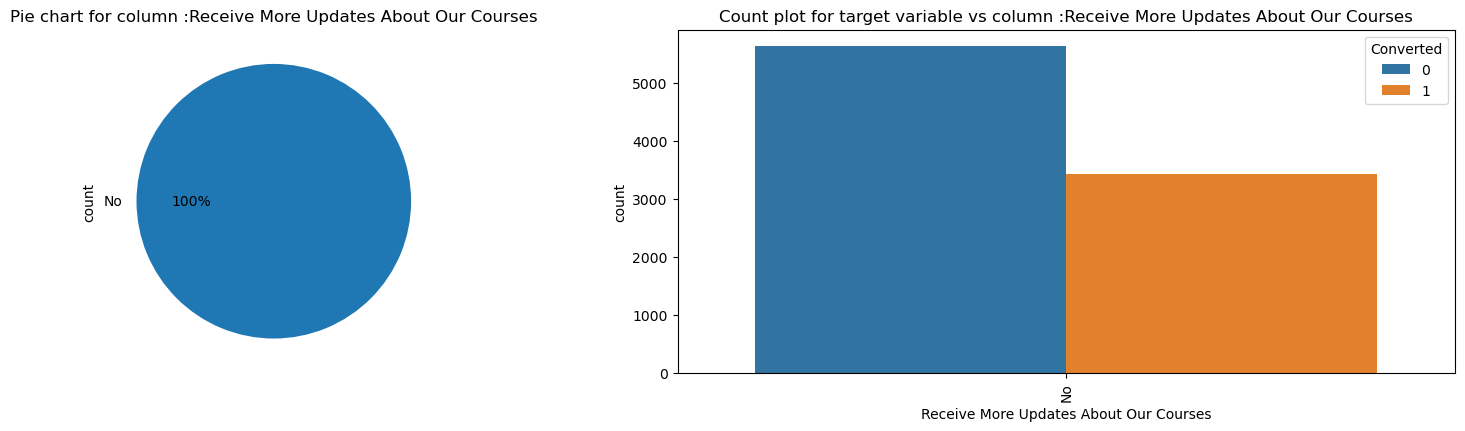

Receive More Updates About Our Courses
No    100.0
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Update me on Supply Chain Content


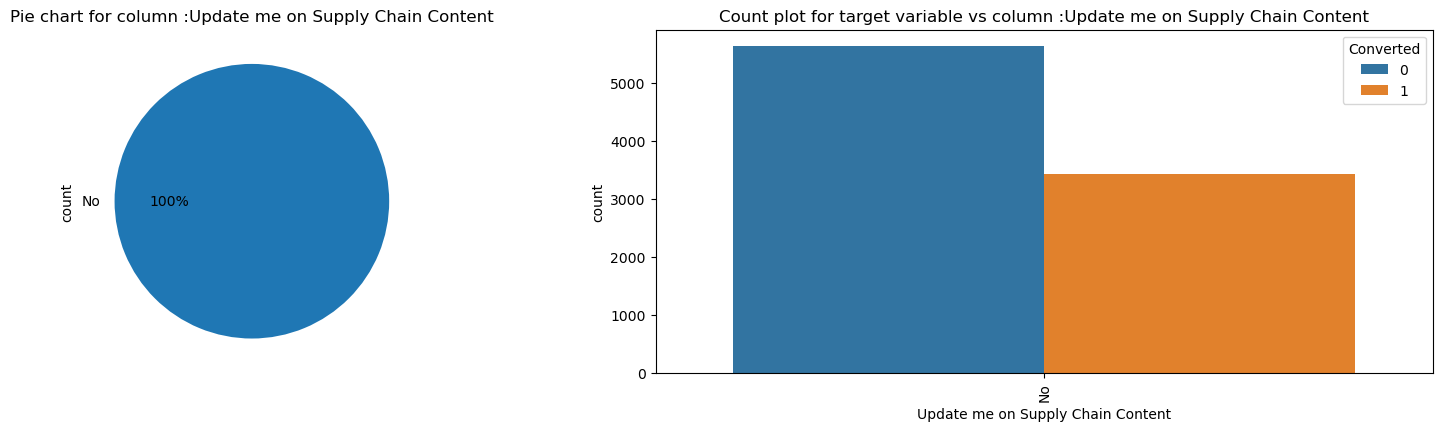

Update me on Supply Chain Content
No    100.0
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Get updates on DM Content


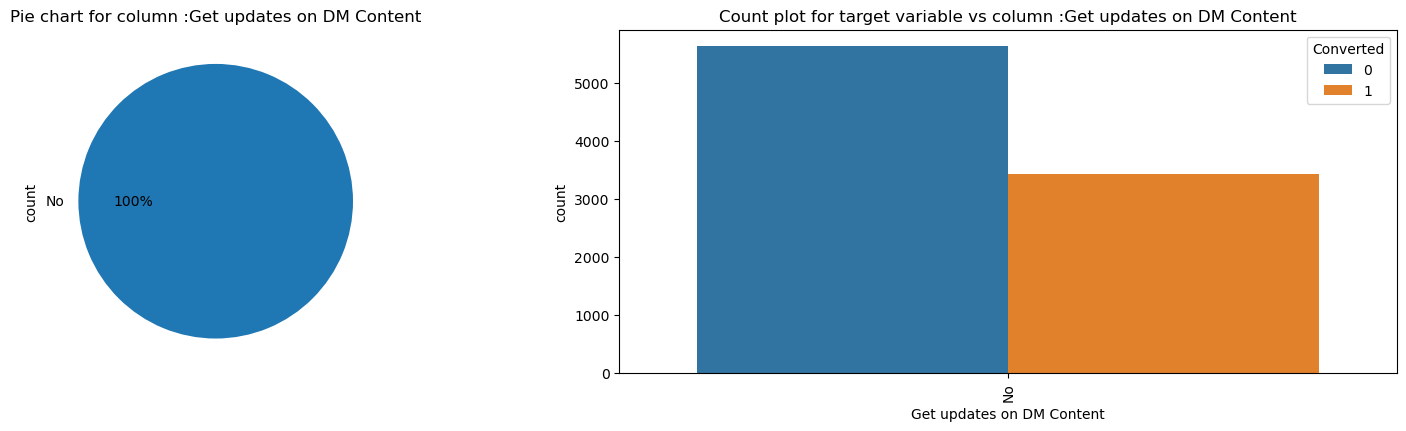

Get updates on DM Content
No    100.0
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  I agree to pay the amount through cheque


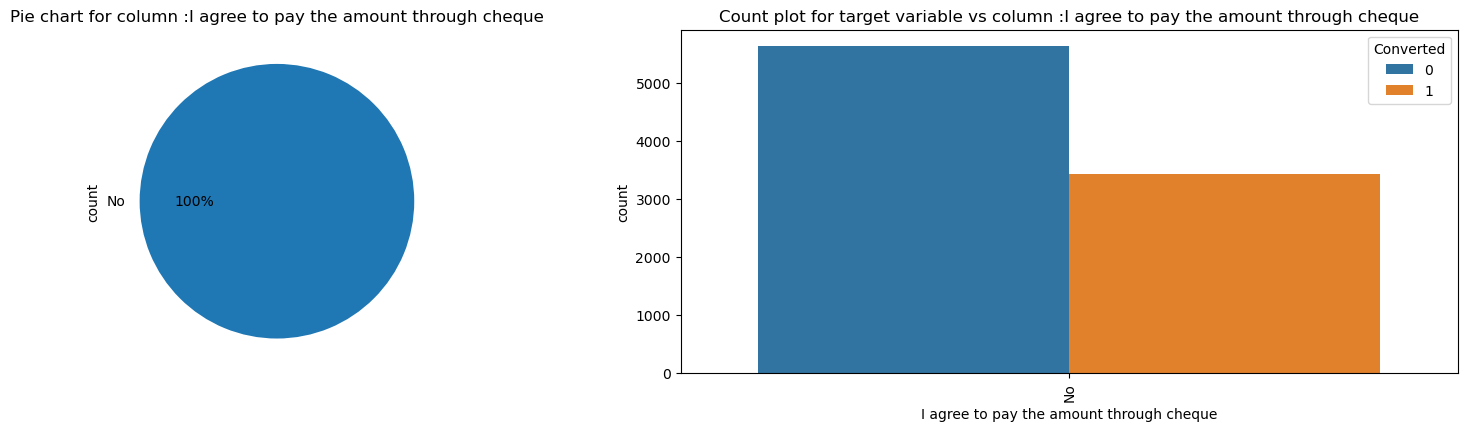

I agree to pay the amount through cheque
No    100.0
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  A free copy of Mastering The Interview


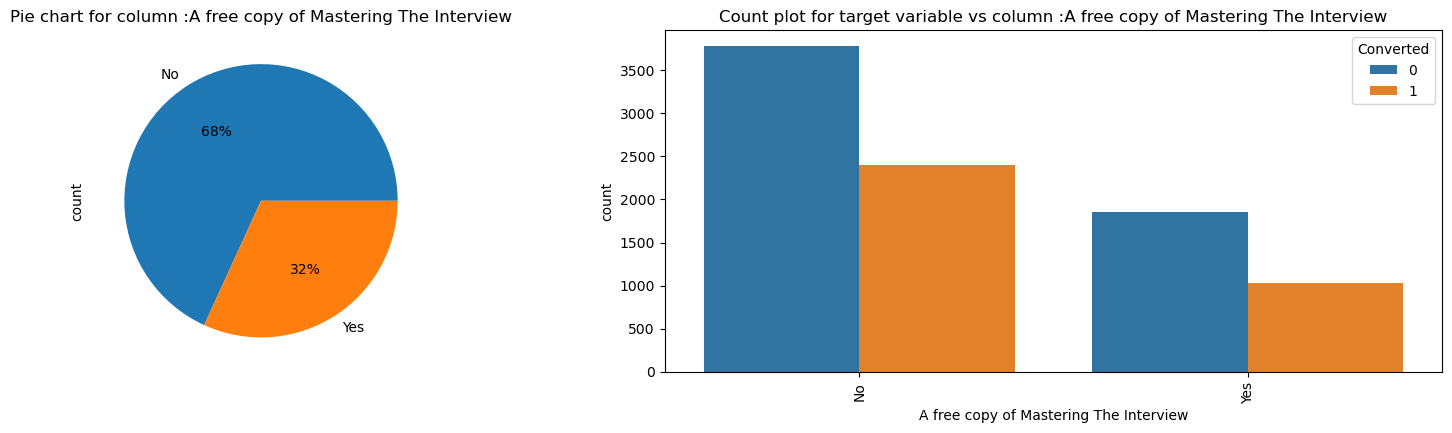

A free copy of Mastering The Interview
No     68.172801
Yes    31.827199
Name: count, dtype: float64
################################################################################################## 

 Univariate Analysis for column :  Last Notable Activity


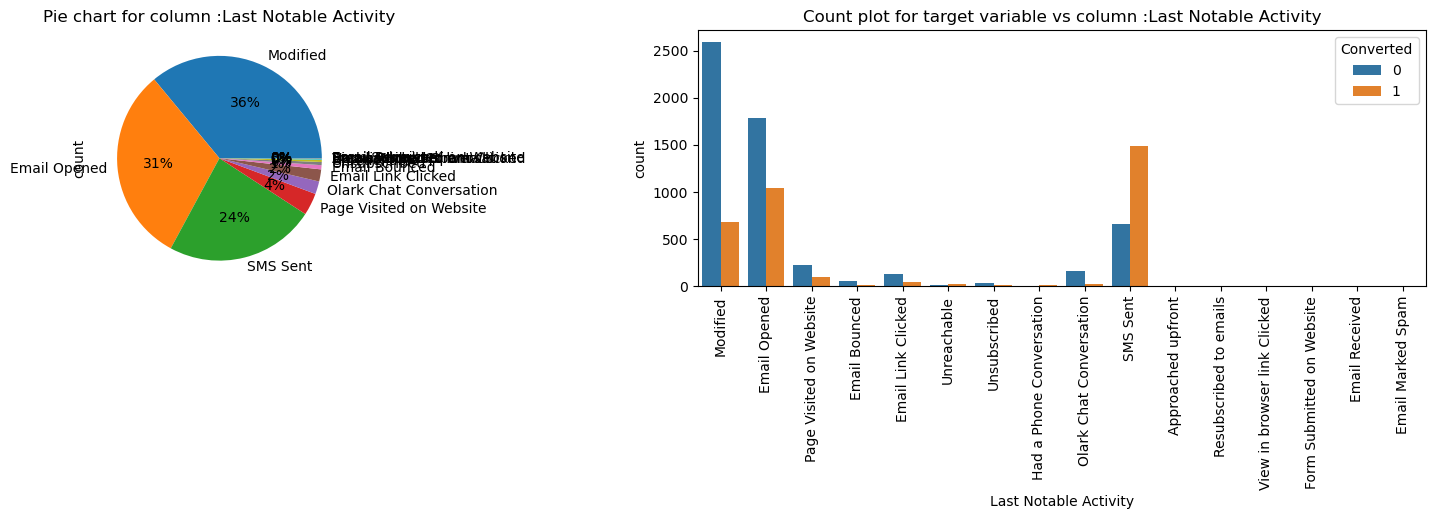

Last Notable Activity
Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Email Received                   0.011020
Form Submitted on Website        0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Name: count, dtype: float64
################################################################################################## 



In [20]:
# user defined function for univariate anlaysis

for column in object_dtype_columns:
    if column == 'Prospect ID':
        continue
    fig = plt.figure(figsize=(16,8))
    # creating pie subplot
    ax1=plt.subplot(2,2,1)
    ls[column].value_counts().plot.pie(autopct= "%1.0f%%", ax=ax1)
    plt.title("Pie chart for column :"+ column)
    print(" Univariate Analysis for column : ", column)
    # creating absolute value count plot
    ax2=plt.subplot(2,2,2)
    sns.countplot(x=column, hue='Converted', data=ls, ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Count plot for target variable vs column :"+ column)
    fig.tight_layout()
    plt.show()
    uni_analysis_grpby = 100*ls.groupby([column])[column].value_counts()/(ls.shape[0])
    print(uni_analysis_grpby[uni_analysis_grpby.values>0].sort_values(ascending=False))
    print('################################################################################################## \n')

### Below Columns have only one type of data value and can dropped 

- 'Do Not Call',
- 'Search',
- 'Magazine', 
- 'Newspaper Article',
- 'X Education Forums', 
- 'Newspaper', 
- 'Digital Advertisement', 
- 'Through Recommendations',
- 'Receive More Updates About Our Courses', 
- 'Update me on Supply Chain Content',
- 'Get updates on DM Content', 
- 'I agree to pay the amount through cheque',

In [21]:
ls = ls.drop(['Do Not Call', 'Search', 'Magazine', 
                    'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                    'Through Recommendations', 'Receive More Updates About Our Courses', 
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 
                    'I agree to pay the amount through cheque'], axis = 1)

### Analyzing Column: Observe each columns  in details and making necessary changes


### 1. Lead Origin
- Lead Origin appears important field, also Lead Add Form happens to have the highest conversion rate. These are the hottest ls which have much higher probability of conversion
- this is followed by API and Landing Page Submission
- Lead Import has negligible count

### 2. Lead Source
- Conversion Rate is highest for Lead Source - Welingak Websit and Reference. This could be an important input as we plan to maximize Conversion Rates 
- top 3 lead generating sources are - Google, Direct Traffic and Olark Chat
### 3. Do Not Email'
- Only 8% Prospect have opted for Do not Email.
- there are no significant observations wrt conversion rates here
### 4. Last Activity
- Graphs shows that there are multiple categories with ver less Data, hence merge these to Others
- SMS sent has highest conversion rate followed by Email Opened
- Top 3 activities - Email Opened, SMS Sent, Olark Chat Conversation
### 5. What is your current occupation
- Maximum values are Unemployed - 86%
- Working Professional have very high conversion rate
- There are many NULLs, now 86% of the Occupation is Unemployed. So Nulls can be replaced with Unemployed
### 6. A free copy of Mastering The Interview in detail
- 68% ls do no want A free copy of Mastering The Interview
- Further, we do not see a reason much difference in the Conversion rates. Across No and Yes values
- The data suggested not specific importance of this column and it can be removed
### 7. Last Notable Activity
- Graphs shows multiple categories with very less data, hence merge these to Others 
- Top 3 Last Notable Activity are - Modified, Email Opened and SMS Sent
- SMS Sent has the highest Conversion Rate and this can be an important input

In [22]:
# Merge Categories with less data into others
# There are typos which - Google vs google etc
ls['Lead Source'] = ls['Lead Source'].replace(['Facebook','bing','Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                                                     'youtubechannel','testone' ,'Pay per Click Ads', 'welearnblog_Home',
                                                     'WeLearn', 'blog', 'NC_EDM'], 'Other_cat')


ls['Lead Source'] = ls['Lead Source'].replace(['google'], 'Google')


In [23]:
ls['Last Activity'] = ls['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','View in browser link Clicked',
                                                     'Approached upfront', 'Email Received', 'Email Marked Spam',
                                                     'Visited Booth in Tradeshow','Resubscribed to emails'], 'Other_Act')


In [24]:
# dropping - A free copy of Mastering The Interview
ls = ls.drop(['A free copy of Mastering The Interview'], axis = 1)

In [25]:
ls['Last Notable Activity']=ls['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                      'Had a Phone Conversation', 'Email Marked Spam',
                                                                       'Approached upfront', 'Resubscribed to emails',
                                                                      'View in browser link Clicked',
                                                                      'Form Submitted on Website',
                                                                      'Email Received'],'Other_Act')


In [26]:
# recheck missing values
ls.isnull().sum()

Prospect ID                    0
Lead Number                    0
Lead Origin                    0
Lead Source                    0
Do Not Email                   0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Last Activity                  0
Last Notable Activity          0
dtype: int64

In [27]:
ls.shape

(9074, 11)

### Analyzing Numerical Varaibles

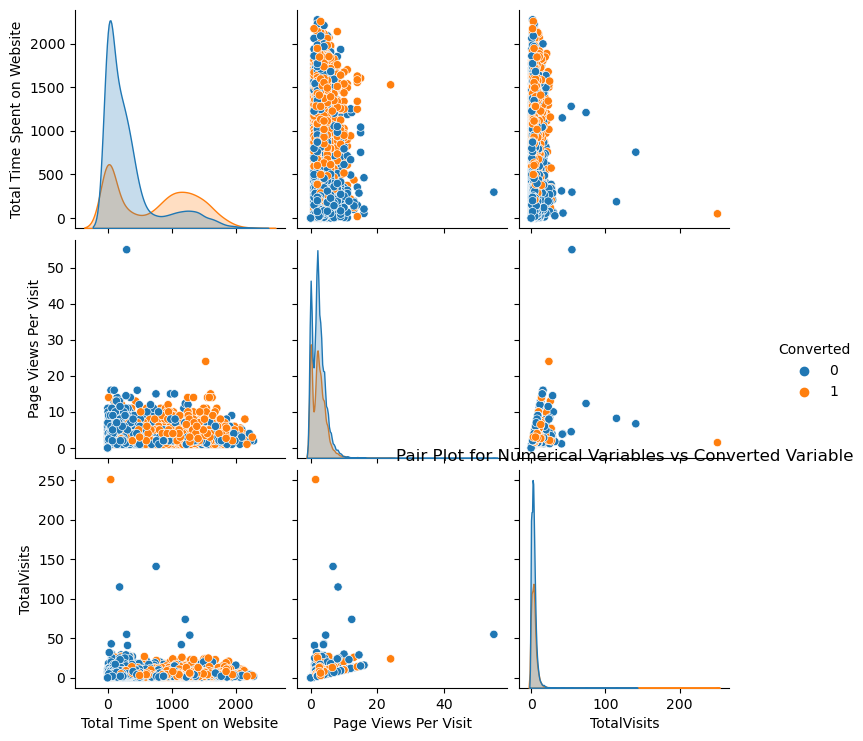

In [28]:
# Creating a Pair Plot between numerical variables
sns.pairplot(ls[['Total Time Spent on Website', 'Page Views Per Visit', 'Converted', 'TotalVisits']], diag_kind='kde', hue='Converted')
plt.title('Pair Plot for Numerical Variables vs Converted Variable')
plt.show()

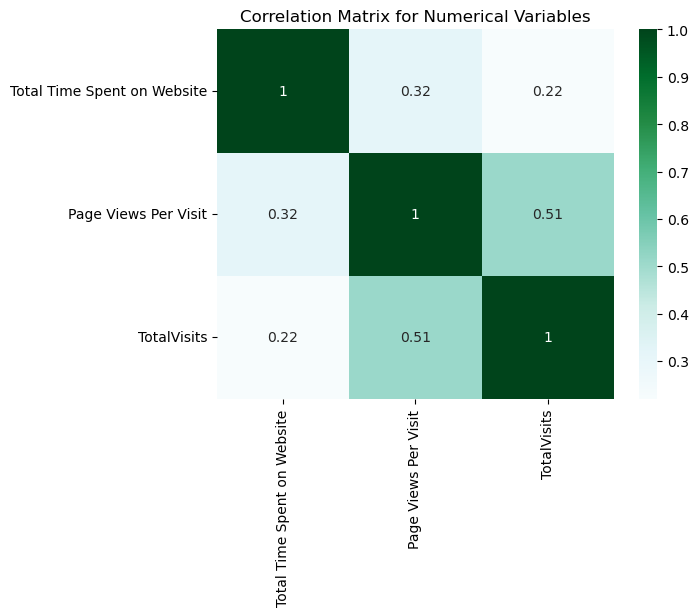

In [29]:
# Creating Heat map for correlation between numerical variables
sns.heatmap(ls[[ 'Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']].corr(), annot=True, cmap='BuGn')
plt.title( "Correlation Matrix for Numerical Variables")
plt.show()

- We see very high correlation between Total Visits and Page Views Per Visit
- We will handle this in the Model Building phase via VIF

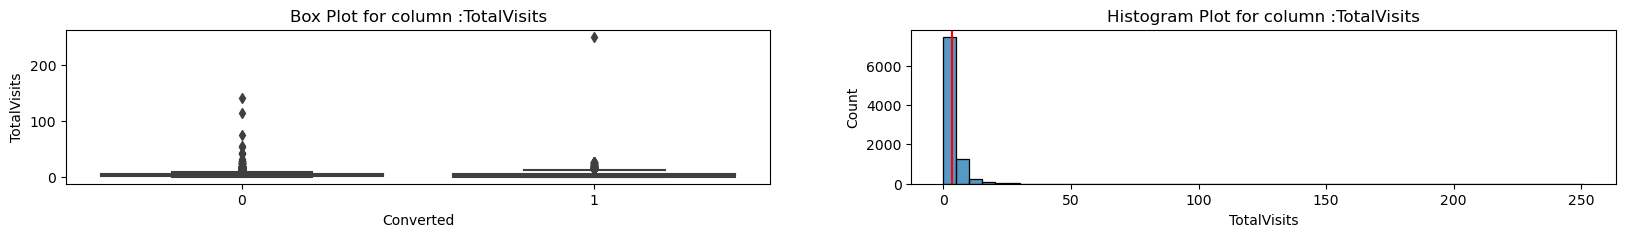



0.000      0.000
0.001      0.000
0.005      0.000
0.010      0.000
0.050      0.000
0.100      0.000
0.200      0.000
0.500      3.000
0.800      5.000
0.900      7.000
0.950     10.000
0.990     17.000
0.995     21.000
0.999     31.854
1.000    251.000
Name: TotalVisits, dtype: float64




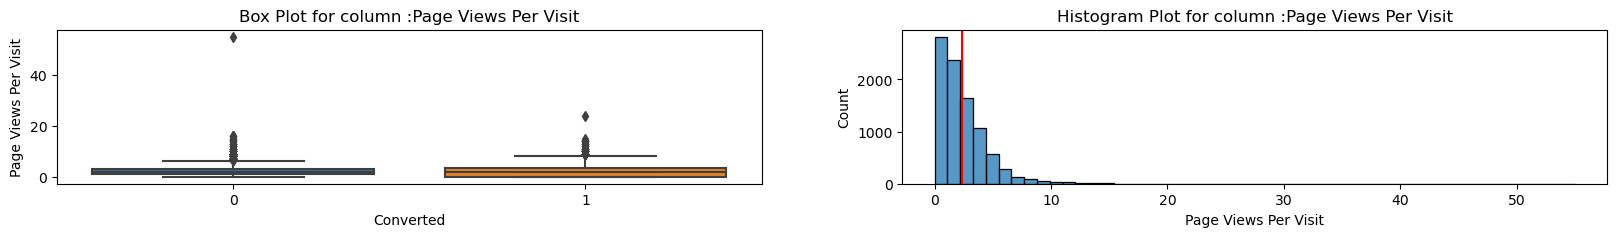



0.000     0.0000
0.001     0.0000
0.005     0.0000
0.010     0.0000
0.050     0.0000
0.100     0.0000
0.200     0.0000
0.500     2.0000
0.800     4.0000
0.900     5.0000
0.950     6.0000
0.990     9.0000
0.995    11.0000
0.999    14.4635
1.000    55.0000
Name: Page Views Per Visit, dtype: float64




In [30]:
# Botplot and Histogram plot for the for the continuous variables


for column in (float_dtype_columns):
    if column == ('Lead Number', 'Converted'):
        continue
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.title("Box Plot for column :"+ column)
    #sns.boxplot(x = bike_df[column], showmeans=True)
    sns.boxplot(x='Converted', y=column, data =ls)
    plt.subplot(1,2,2)
    plt.title("Histogram Plot for column :"+ column)
    sns.histplot(data=ls, x=column, bins=50)
    plt.axvline(x=ls[column].mean(),color='red')
    plt.show()
    print('\n')
    print(ls[column].quantile([0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1]))
    print('\n')

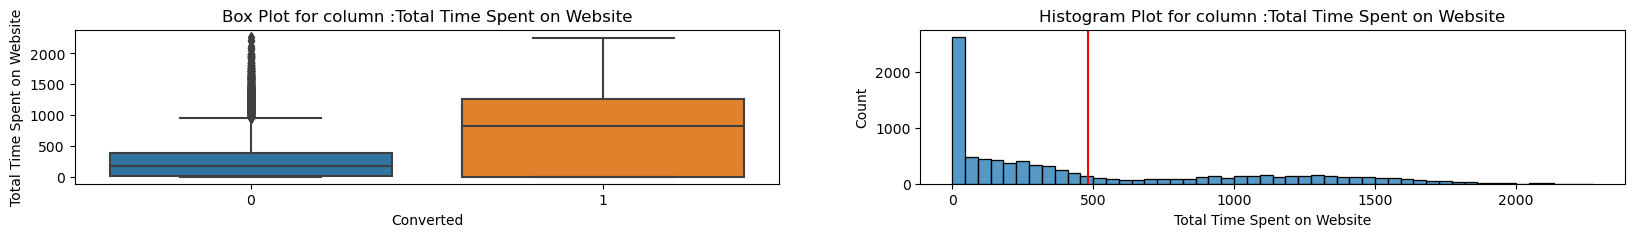



0.000       0.000
0.001       0.000
0.005       0.000
0.010       0.000
0.050       0.000
0.100       0.000
0.200       0.000
0.500     246.000
0.800    1078.400
0.900    1373.000
0.950    1557.000
0.990    1839.000
0.995    1929.445
0.999    2111.927
1.000    2272.000
Name: Total Time Spent on Website, dtype: float64




In [31]:
# Botplot and Histogram plot for the for the continuous variables


for column in (int_dtype_columns):
    if column == 'Lead Number':
        continue
    if column == 'Converted':
        continue
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.title("Box Plot for column :"+ column)
    #sns.boxplot(x = bike_df[column], showmeans=True)
    sns.boxplot(x='Converted', y=column, data =ls)
    plt.subplot(1,2,2)
    plt.title("Histogram Plot for column :"+ column)
    sns.histplot(data=ls, x=column, bins=50)
    plt.axvline(x=ls[column].mean(),color='red')
    plt.show()
    print('\n')
    print(ls[column].quantile([0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1]))
    print('\n')

Remarks: we see very high outlier values which need to be removed

In [32]:
# TotalVisits: Retain values less than 31.854 which is 99.9 percentile
ls= ls[ls['TotalVisits']<=31.854]
ls.shape

(9064, 11)

In [33]:
# Page Views Per Visit: Retain values less than 14.4635 which is 99.9 percentile
ls= ls[ls['Page Views Per Visit']<=14.4635]
ls.shape

(9055, 11)

In [34]:
# Total Time Spent on Website: Retain values less than 2111.927 which is 99.9 percentile
ls= ls[ls['Total Time Spent on Website']<=2111.927]
ls.shape

(9045, 11)

In [35]:
# Reviewing Data Head
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified


# Feature Engineering
- making changes to features - creating dummy variables, converting Categorical variables to Numeric etc.

In [36]:
# Changing categorical features to Numerical - Yes to 1 and No to 0
ls['Do Not Email']= ls['Do Not Email'].replace(['Yes'], 1)
ls['Do Not Email']= ls['Do Not Email'].replace(['No'], 0)

In [37]:
ls.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9045 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9045 non-null   object 
 1   Lead Number                  9045 non-null   int64  
 2   Lead Origin                  9045 non-null   object 
 3   Lead Source                  9045 non-null   object 
 4   Do Not Email                 9045 non-null   int64  
 5   Converted                    9045 non-null   int64  
 6   TotalVisits                  9045 non-null   float64
 7   Total Time Spent on Website  9045 non-null   int64  
 8   Page Views Per Visit         9045 non-null   float64
 9   Last Activity                9045 non-null   object 
 10  Last Notable Activity        9045 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 848.0+ KB


In [38]:
# Creating dummy Variables for remaining categorical variable with multiple values

var_dum= pd.get_dummies(ls[['Lead Origin','Lead Source', 'Last Activity', 
                                'Last Notable Activity']], drop_first=True, dtype=float)

var_dum.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_cat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Act,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Act,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
# Concatenating with main dataframe
ls1= pd.concat([ls, var_dum], axis=1)

In [40]:
# Viewging the data head
ls1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_cat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Act,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Act,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Modified,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Email Opened,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Email Opened,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Modified,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Modified,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
# Dropping the original Categorical columns

ls1= ls1.drop(['Lead Origin','Lead Source', 'Last Activity', 'Last Notable Activity'], axis=1)

In [42]:
ls1.shape

(9045, 32)

In [43]:
# Preparing data for Modelling
X = ls1.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

y = ls1['Converted']

In [44]:
# importing train_test_split for creating Training and Testing Datasets
from sklearn.model_selection import train_test_split

In [45]:
# Creating Training and Test Data sets

# We have used the option stratify = y to ensure that training and test data has proportionate values of Output variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)


### Feature Scaling
- We will use StandardScaler to fit and transform only the training data
- The same scaler will be used to only transform the test data as we do not want it to learn about test data


In [46]:
# Importing StandardScaler to scale Numerical variables
from sklearn.preprocessing import StandardScaler


In [47]:
# Instantiating StandardScaler
scaler = StandardScaler()

# Scaling only numerical features
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_cat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Act,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Act,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8911,0,-0.991456,-0.888354,-1.155607,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3801,0,-0.104219,-0.407880,0.322215,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6761,0,-0.399964,-0.827836,-0.170393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7137,0,-0.991456,-0.888354,-1.155607,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7342,0,1.078764,-0.624277,2.292643,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
# Checking the skewness in data by checking % of Converted
converted = (sum(ls1['Converted'])/len(ls1['Converted'].index))*100
print(converted)

37.87728026533997


- We see that around 38% of prospects on average go ahead with the purchase

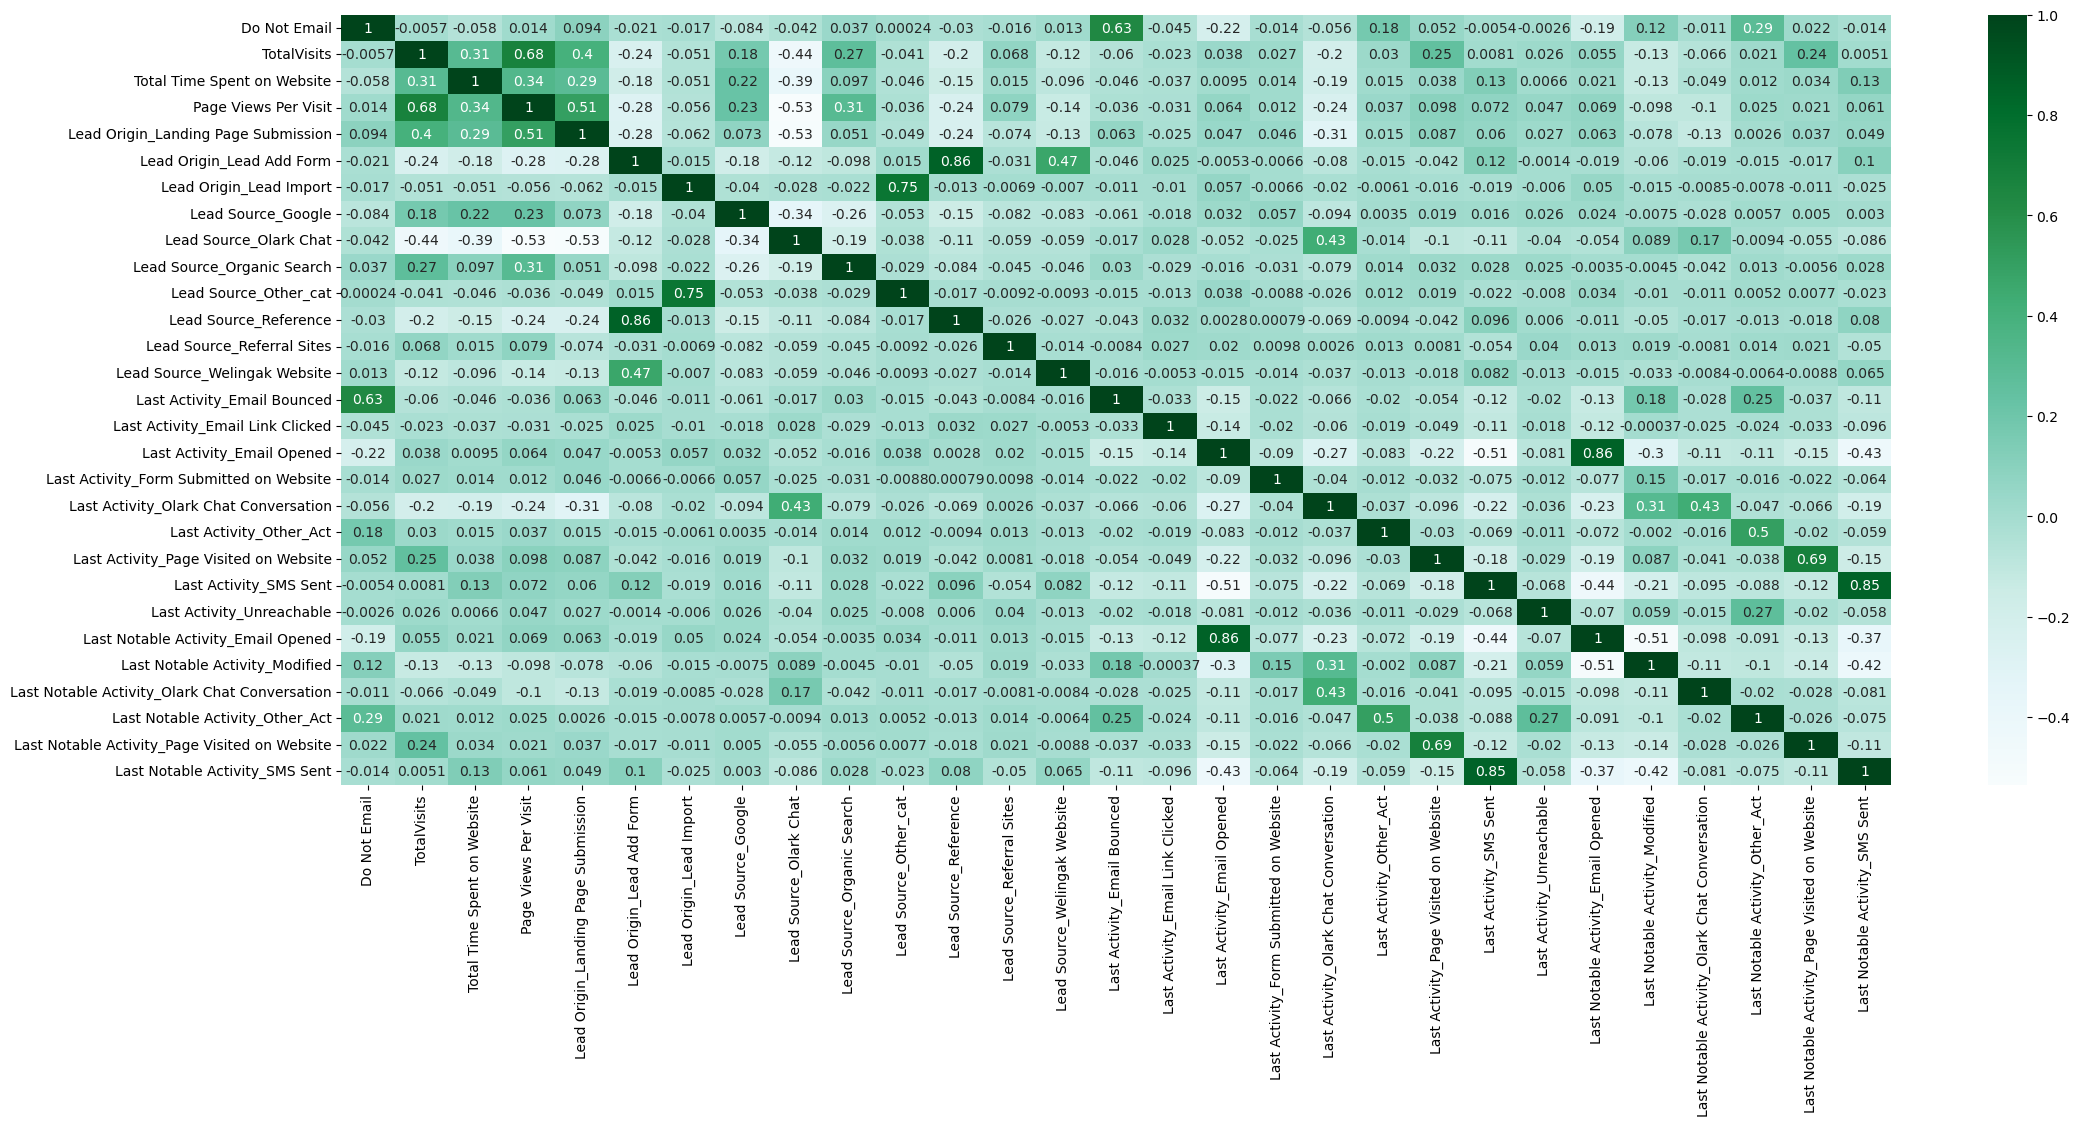

In [49]:
# Understanding Correlations between variables
plt.figure(figsize = (25,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap='BuGn')
plt.show()

- We see some darker shades which signifies high correlation between variables
- We will address these in our modelling exercise using VIF scores

### Build Initial model

In [50]:
# Import & Instal LRM
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
# Import StatsModel API
import statsmodels.api as sm

# LRM
log_m1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.5
Date:                Tue, 21 May 2024   Deviance:                       5533.0
Time:                        09:17:19   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Do Not Email                                     -1.4439      0.199     -7.259      0.000      -1.834      -1.054
TotalVisits                                       0.2437      0.046      5.261      0.000       0.153       0.335
Total Time Spent on Website                       1.1329      0.039     28.689      0.000       1.056       1.210
Page Views Per Visit                             -0.1689      0.052     -3.249      0.001      -0.271      -0.067
Lead Origin_Landing Page Submission              -0.1865      0.095     -1.956      0.051      -0.373       0.000
Lead Origin_Lead Add Form                         3.6320      1.483      2.448      0.014       0.724       6.539
Lead Origin_Lead Import                           1.9950      1.214      1.644      0.100      -0.384       4.374
Lead Source_Google                                0.2488      0.092      2.715      0.007       0.069       0.428
Lead Source_Olark Chat                            1.1440      0.149      7.687      0.000       0.852       1.436
Lead Source_Organic Search                        0.0583      0.122      0.477      0.634      -0.181       0.298
Lead Source_Other_cat                            -1.0800      1.094     -0.987      0.323      -3.224       1.064
Lead Source_Reference                             0.9445      1.503      0.628      0.530      -2.001       3.890
Lead Source_Referral Sites                        0.2042      0.295      0.693      0.488      -0.373       0.782
Lead Source_Welingak Website                      2.1684      1.651      1.313      0.189      -1.068       5.405
Last Activity_Email Bounced                      -0.6010      0.454     -1.325      0.185      -1.490       0.288
Last Activity_Email Link Clicked                 -1.1364      0.223     -5.106      0.000      -1.573      -0.700
Last Activity_Email Opened                        0.4906      0.208      2.353      0.019       0.082       0.899
Last Activity_Form Submitted on Website           0.0960      0.346      0.278      0.781      -0.581       0.773
Last Activity_Olark Chat Conversation            -0.9987      0.250     -3.991      0.000      -1.489      -0.508
Last Activity_Other_Act                           1.2476      0.430      2.903      0.004       0.405       2.090
Last Activity_Page Visited on Website            -0.0737      0.260     -0.283      0.777      -0.584       0.436
Last Activity_SMS Sent                            0.6971      0.215      3.247      0.001       0.276       1.118
Last Activity_Unreachable                         0.1395      0.408      0.342      0.733      -0.661       0.940
Last Notable Activity_Email Opened               -1.5679      0.231     -6.802      0.000      -2.020      -1.116
Last 

### Use RFE for feature selection
- There are so many variables and we will be using RFE to select the top 20 most significant variables

In [52]:
# Import RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False,  True])

In [54]:
# List of all features, True means that the variable is selected
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
print('\n')
print('list of columns from RFE \n')
col = X_train.columns[rfe.support_]
print(col)
print('\n')
print('List of varaibles not selected \n')
print(X_train.columns[~rfe.support_])

[('Do Not Email', True, 1), ('TotalVisits', False, 4), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', False, 6), ('Lead Origin_Landing Page Submission', False, 11), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', True, 1), ('Lead Source_Google', False, 3), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 14), ('Lead Source_Other_cat', False, 10), ('Lead Source_Reference', True, 1), ('Lead Source_Referral Sites', False, 2), ('Lead Source_Welingak Website', True, 1), ('Last Activity_Email Bounced', True, 1), ('Last Activity_Email Link Clicked', False, 9), ('Last Activity_Email Opened', True, 1), ('Last Activity_Form Submitted on Website', False, 8), ('Last Activity_Olark Chat Conversation', True, 1), ('Last Activity_Other_Act', True, 1), ('Last Activity_Page Visited on Website', False, 13), ('Last Activity_SMS Sent', True, 1), ('Last Activity_Unreachable', False, 5), ('Last Notable Activity_Email Opened', False, 15), ('Las

In [55]:
# import VIF & check multi-collinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create X_train_rfe and X_train_iter (for multiple iterations) with RFE selected variables
X_train_rfe = X_train[col]
X_train_iter = X_train[col]

### Model 1

In [57]:
# Adding a constant to the model
X_train_lg1=sm.add_constant(X_train_iter)

log_m1 = sm.GLM(y_train,X_train_lg1, family = sm.families.Binomial())
res = log_m1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.7
Date:                Tue, 21 May 2024   Deviance:                       5565.3
Time:                        09:17:20   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3610
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [58]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                 Features    VIF
2               Lead Origin_Lead Add Form  65.58
5                   Lead Source_Reference  50.41
6            Lead Source_Welingak Website  16.20
11                 Last Activity_SMS Sent   6.53
14         Last Notable Activity_SMS Sent   6.12
7             Last Activity_Email Bounced   2.01
0                            Do Not Email   1.97
12         Last Notable Activity_Modified   1.92
4                  Lead Source_Olark Chat   1.80
9   Last Activity_Olark Chat Conversation   1.72
13        Last Notable Activity_Other_Act   1.56
10                Last Activity_Other_Act   1.48
1             Total Time Spent on Website   1.30
8              Last Activity_Email Opened   1.21
3                 Lead Origin_Lead Import   1.01


In [59]:
# High P value for -  Lead Source_Reference


X_train_iter = X_train_iter.drop(['Lead Source_Reference'], axis = 1)

### Model 2

In [60]:
X_train_lg2=sm.add_constant(X_train_iter)

log_m2 = sm.GLM(y_train,X_train_lg2, family = sm.families.Binomial())
res = log_m2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.4
Date:                Tue, 21 May 2024   Deviance:                       5566.7
Time:                        09:17:20   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3609
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [61]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                 Features   VIF
10                 Last Activity_SMS Sent  6.53
13         Last Notable Activity_SMS Sent  6.11
6             Last Activity_Email Bounced  2.01
0                            Do Not Email  1.97
11         Last Notable Activity_Modified  1.92
4                  Lead Source_Olark Chat  1.80
8   Last Activity_Olark Chat Conversation  1.72
12        Last Notable Activity_Other_Act  1.56
9                 Last Activity_Other_Act  1.48
2               Lead Origin_Lead Add Form  1.47
1             Total Time Spent on Website  1.30
5            Lead Source_Welingak Website  1.30
7              Last Activity_Email Opened  1.21
3                 Lead Origin_Lead Import  1.01


In [62]:
# High P value for -  Last Activity_Email Bounced 

X_train_iter = X_train_iter.drop(['Last Activity_Email Bounced'], axis = 1)

In [63]:
### Model 3

X_train_lg3=sm.add_constant(X_train_iter)

log_m3 = sm.GLM(y_train,X_train_lg3, family = sm.families.Binomial()) # Running model with new X_train
res = log_m3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.6
Date:                Tue, 21 May 2024   Deviance:                       5569.1
Time:                        09:17:20   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3606
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [64]:

# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


                                 Features   VIF
9                  Last Activity_SMS Sent  6.31
12         Last Notable Activity_SMS Sent  6.03
10         Last Notable Activity_Modified  1.81
4                  Lead Source_Olark Chat  1.79
7   Last Activity_Olark Chat Conversation  1.68
11        Last Notable Activity_Other_Act  1.48
2               Lead Origin_Lead Add Form  1.47
8                 Last Activity_Other_Act  1.37
1             Total Time Spent on Website  1.30
5            Lead Source_Welingak Website  1.30
0                            Do Not Email  1.25
6              Last Activity_Email Opened  1.20
3                 Lead Origin_Lead Import  1.01


In [65]:
# High P value for -  Lead Source_Welingak Website

X_train_iter = X_train_iter.drop(['Lead Source_Welingak Website'], axis = 1)

In [66]:
### Model 4

X_train_lg4=sm.add_constant(X_train_iter)

log_m4 = sm.GLM(y_train,X_train_lg4, family = sm.families.Binomial())
res = log_m4.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.4
Date:                Tue, 21 May 2024   Deviance:                       5572.9
Time:                        09:17:20   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3602
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [67]:

# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


                                 Features   VIF
8                  Last Activity_SMS Sent  6.31
11         Last Notable Activity_SMS Sent  6.03
9          Last Notable Activity_Modified  1.81
4                  Lead Source_Olark Chat  1.79
6   Last Activity_Olark Chat Conversation  1.68
10        Last Notable Activity_Other_Act  1.48
7                 Last Activity_Other_Act  1.37
1             Total Time Spent on Website  1.29
0                            Do Not Email  1.25
5              Last Activity_Email Opened  1.20
2               Lead Origin_Lead Add Form  1.18
3                 Lead Origin_Lead Import  1.01


In [68]:
# High P value for -  Lead Origin_Lead Import

X_train_iter = X_train_iter.drop(['Lead Origin_Lead Import'], axis = 1)

In [69]:
### Model 5

X_train_lg5=sm.add_constant(X_train_iter)

log_m5 = sm.GLM(y_train,X_train_lg5, family = sm.families.Binomial())
res = log_m5.fit()
print(res.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.6
Date:                Tue, 21 May 2024   Deviance:                       5575.2
Time:                        09:17:20   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3600
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [70]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                 Features   VIF
7                  Last Activity_SMS Sent  6.30
10         Last Notable Activity_SMS Sent  6.02
8          Last Notable Activity_Modified  1.81
3                  Lead Source_Olark Chat  1.79
5   Last Activity_Olark Chat Conversation  1.68
9         Last Notable Activity_Other_Act  1.48
6                 Last Activity_Other_Act  1.37
1             Total Time Spent on Website  1.29
0                            Do Not Email  1.25
4              Last Activity_Email Opened  1.19
2               Lead Origin_Lead Add Form  1.18


In [71]:
# High VIF for - Last Activity_SMS Sent

X_train_iter = X_train_iter.drop(['Last Activity_SMS Sent'], axis = 1)

In [72]:
### Model 6

X_train_lg6=sm.add_constant(X_train_iter)

log_m6 = sm.GLM(y_train,X_train_lg6, family = sm.families.Binomial())
res = log_m6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6331
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.8
Date:                Tue, 21 May 2024   Deviance:                       5597.5
Time:                        09:17:20   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [73]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                Features   VIF
3                 Lead Source_Olark Chat  1.78
5  Last Activity_Olark Chat Conversation  1.59
8        Last Notable Activity_Other_Act  1.48
7         Last Notable Activity_Modified  1.44
6                Last Activity_Other_Act  1.36
1            Total Time Spent on Website  1.28
0                           Do Not Email  1.24
9         Last Notable Activity_SMS Sent  1.18
2              Lead Origin_Lead Add Form  1.17
4             Last Activity_Email Opened  1.17



-  The P values are less than 5% and VIF is undercontrol so the model is stable now

### Making Predicitons on Training Data

In [74]:
# Using the final model and final set of features to preduct probabilities for Converted
y_train_pred = res.predict(X_train_lg6)

# Viewing top 20 predicitons
y_train_pred[:20]

# reshaing the output
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]


array([0.17655148, 0.17686628, 0.11758649, 0.27787367, 0.08558592,
       0.08065817, 0.90894786, 0.68840406, 0.13960438, 0.93040563,
       0.26497155, 0.27787367, 0.60912055, 0.17564711, 0.20282435,
       0.2516441 , 0.68929839, 0.22129063, 0.66322888, 0.4147001 ])

### We will now create a Data Frame to house our predictions
- to store the Prospect Index, target variable - converted and predicted probabilities

In [75]:
# Creating a Data Frame
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect Index
0,1,0.176551,8911
1,1,0.176866,3801
2,0,0.117586,6761
3,1,0.277874,7137
4,1,0.085586,7342


### Predicting converted values basis Probablities
- We will first take a random threshold 0.3 to predict probabilities

In [76]:
# Testing for threshold as 0.3
y_train_pred_final['predicted_1'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

# viewing the top 10 values
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect Index,predicted_1
0,1,0.176551,8911,0
1,1,0.176866,3801,0
2,0,0.117586,6761,0
3,1,0.277874,7137,0
4,1,0.085586,7342,0
5,0,0.080658,3767,0
6,1,0.908948,8184,1
7,0,0.688404,7825,1
8,0,0.139604,3160,0
9,1,0.930406,6193,1


### Evaluating Model Performance
We will be evalauting model performance on 3 parameters
- Accuracy
- Specificity
- Sensitivity


In [77]:
# Importing metrics from SK learn to create confusion metrics
from sklearn import metrics

# Building the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_1 )
print(confusion)


[[3054  879]
 [ 421 1977]]


In [78]:
# Calculating Model Accuracy with threshold 0.3 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_1))


0.7946611909650924


In [79]:
# Calculating Specificity and Sentivity

TP = confusion[1,1] # true positive - from confusion metrics
TN = confusion[0,0] # true negatives - from confusion metrics
FP = confusion[0,1] # false positives - from confusion metrics
FN = confusion[1,0] # false negatives - from confusion metrics

In [80]:
# Calculating Sentivity for final model with threshold 0.3
TP / float(TP+FN)

0.8244370308590492

In [81]:
# Calculating Specificity for final model with threshold 0.3
TN / float(TN+FP)

0.7765064836003052

In [82]:
# Writing a function to Draw a ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )


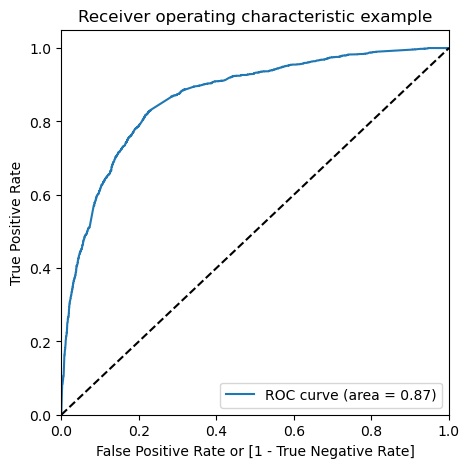

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)



- from the ROC curve a threshold of 0.3 apprears to be good as the ROC curve becomes flatter after this point


In [85]:
# We will create different probability cutoffs and check the model accuracy, specificity and senstivity
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect Index,predicted_1,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,1,0.176551,8911,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.176866,3801,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.117586,6761,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.277874,7137,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.085586,7342,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# We will noe calculate accuracy sensitivity and specificity for various probability thresholds
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.378771  1.000000  0.000000
0.05  0.05  0.434213  0.996247  0.091533
0.10  0.10  0.562154  0.972060  0.312230
0.15  0.15  0.663560  0.932444  0.499619
0.20  0.20  0.726426  0.903670  0.618357
0.25  0.25  0.765440  0.874479  0.698958
0.30  0.30  0.794661  0.824437  0.776506
0.35  0.35  0.795451  0.804003  0.790236
0.40  0.40  0.798610  0.759800  0.822273
0.45  0.45  0.799716  0.716013  0.850750
0.50  0.50  0.793871  0.662636  0.873888
0.55  0.55  0.794187  0.627189  0.896008
0.60  0.60  0.788975  0.590075  0.910247
0.65  0.65  0.768283  0.496664  0.933893
0.70  0.70  0.759912  0.450375  0.948640
0.75  0.75  0.750908  0.409925  0.958810
0.80  0.80  0.737640  0.356547  0.969997
0.85  0.85  0.722635  0.301501  0.979405
0.90  0.90  0.696572  0.221018  0.986524
0.95  0.95  0.652504  0.088407  0.996440


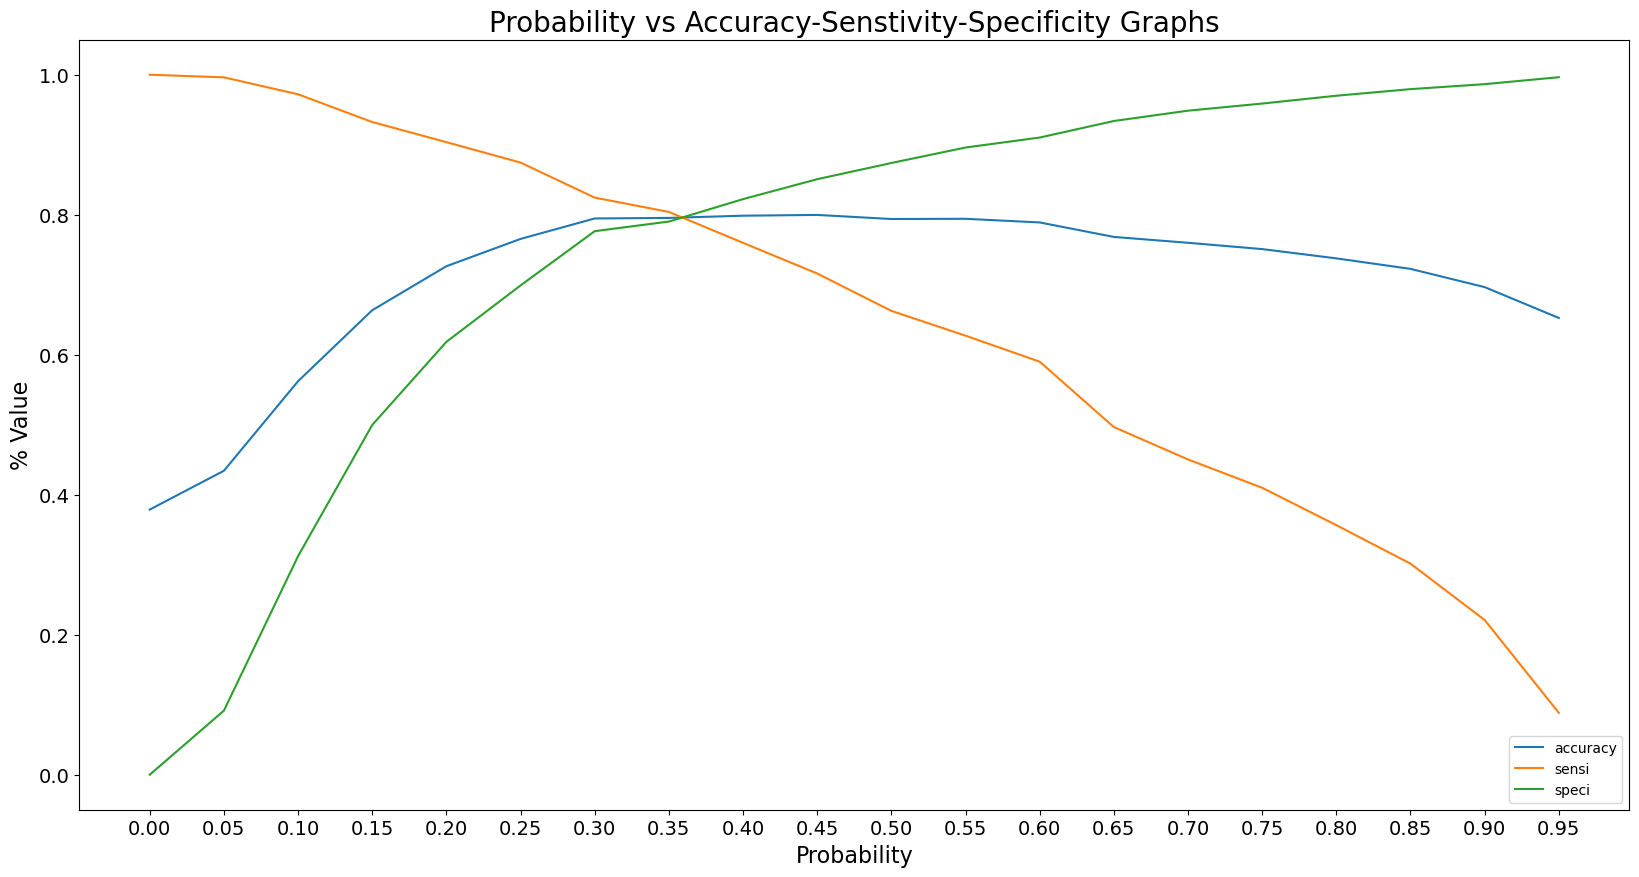

In [87]:
# Plotting accuracy sensitivity and specificity for various probabilities.


fig, ax = plt.subplots(figsize=(20, 10))
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], ax=ax)
plt.xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
ax.set_xlabel('Probability', fontsize=16)
ax.set_ylabel('% Value', fontsize=16)
ax.tick_params(axis = 'x', labelsize =14)
ax.tick_params(axis = 'y', labelsize =14)
plt.title('Probability vs Accuracy-Senstivity-Specificity Graphs', fontsize = 20)
plt.show()

- From the above graph, approx 0.37 is the optimum point to take it as a cutoff probability.


In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect Index,predicted_1,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,1,0.176551,8911,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.176866,3801,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.117586,6761,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.277874,7137,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.085586,7342,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.796240720265361

In [90]:
# Creating final confusion matrix on training predictions with Probability Cutoff 0.37
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train


array([[3157,  776],
       [ 514, 1884]])

In [91]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [92]:
# Calculating Sensitivity for Probability cutoff threshold - 0.37
TP / float(TP+FN)

0.7856547122602169

In [93]:
# Calculating Specificity for threshold - 0.37
TN / float(TN+FP)

0.8026951436562421

### Calculating Precision and Recall

In [94]:
# Importing precision and recall scores for calculation
from sklearn.metrics import precision_score, recall_score

In [95]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7082706766917293

In [96]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7856547122602169

In [97]:
### Understanding Precision Recall Trade Off

In [98]:
from sklearn.metrics import precision_recall_curve

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


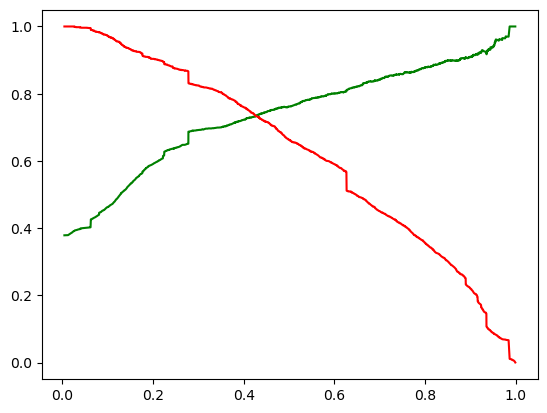

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


- If we have to balance Precision and Recall 0.4 could be a good Probability threshold


### Making Predictions on Test Data

In [102]:
# Transforming Test data with the scaler
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [103]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_iter.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)


In [104]:
# Making predictions on test data
y_test_pred = res.predict(X_test_sm)
y_test_pred[:20]

4747    0.017990
8465    0.467157
7845    0.365170
3289    0.914705
1142    0.064816
1593    0.592095
8890    0.476863
5290    0.493550
2949    0.098282
1455    0.533820
1834    0.220104
9232    0.956108
6603    0.416727
2638    0.176551
4559    0.770619
3192    0.456110
976     0.005340
8284    0.198143
4701    0.062090
2766    0.046333
dtype: float64

In [105]:
# Converting y_test_pred to a dataframe 
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Viewing Data Head
y_test_pred_1.head()

,0
4747,0.017990
8465,0.467157
7845,0.365170
3289,0.914705
1142,0.064816


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting CustID to index
y_test_df['Prospect Index'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_test_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [111]:
y_test_pred_final.head()

,Converted,Prospect Index,0
0,0,4747,0.017990
1,1,8465,0.467157
2,1,7845,0.365170
3,1,3289,0.914705
4,0,1142,0.064816


In [112]:

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [113]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['Prospect_ID','Converted','Converted_prob'], axis=1)


In [114]:
# Using Probability threshold 0.37 to make predictions for Converted Prospects
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)


In [115]:
# Calculating overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)


0.7899778924097274

In [116]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_test


array([[1336,  350],
       [ 220,  808]])

In [117]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [118]:
# Calculaitng sensitivity for test data with Probability Threshold - 0.37
TP / float(TP+FN)

0.7859922178988327

In [119]:
# Let us calculate specificity for test data with Probability Threshold - 0.37
TN / float(TN+FP)

0.7924080664294187

In [120]:

precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)


0.697754749568221

In [121]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)


0.7859922178988327

### Final Results

- The final Model for Logistic Regression is as follows


Converted_Probability = 
const                                *    -1.3742      
Do Not Email                         *    -1.6519     
Total Time Spent on Website          *     1.1376      
Lead Origin_Lead Add Form            *     4.7573     
Lead Source_Olark Chat               *     1.1293     
Last Activity_Email Opened           *     0.3005     
Last Activity_Olark Chat Conversation *   -1.1752      
Last Activity_Other_Act              *     1.2745      
Last Notable Activity_Modified       *    -0.2844      
Last Notable Activity_Other_Act      *     1.0615      
Last Notable Activity_SMS Sent       *     1.7732      

#### Accuracy Scores

##### Training Data Scores calculated at probability cutoff threshold = 0.37
- Accuracy = 79.6%
- Sensitivity = 78.6%
- Specificity = 80.3%
- Precision = 70.8%
- Recall = 76.6%


##### Test Data Scores calculated at probability cutoff threshold = 0.37
- Accuracy = 79%%
- Sensitivity = 78.6%
- Specificity = 79.2%
- Precision = 69.7%
- Recall = 78.6%

### Top predictors

In [122]:
# Creating a data frame for final features
pd.options.display.float_format= '{:.2f}'.format
final_features=res.params[1:]

final_features_df = pd.DataFrame(final_features)
final_features_df =final_features_df.reset_index()
final_features_df.shape
final_features_df.columns = ['Feature_Name', 'Coeff']
print(final_features_df)

                            Feature_Name  Coeff
0                           Do Not Email  -1.65
1            Total Time Spent on Website   1.14
2              Lead Origin_Lead Add Form   4.76
3                 Lead Source_Olark Chat   1.13
4             Last Activity_Email Opened   0.30
5  Last Activity_Olark Chat Conversation  -1.18
6                Last Activity_Other_Act   1.27
7         Last Notable Activity_Modified  -0.28
8        Last Notable Activity_Other_Act   1.06
9         Last Notable Activity_SMS Sent   1.77


#### Plotting the final features

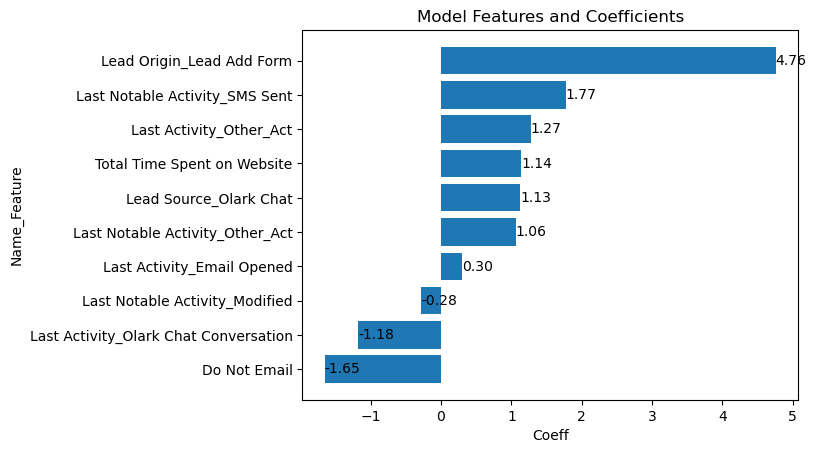

In [123]:
final_features_sort = final_features_df.sort_values('Coeff')
plt.barh(final_features_sort['Feature_Name'], final_features_sort['Coeff'])
plt.xlabel('Coeff')
plt.ylabel('Name_Feature')
plt.title('Model Features and Coefficients')

for i, value in enumerate(final_features_sort['Coeff']):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')
    
plt.show()

#### Top Two variables which led to a higher conversion rate are

- Lead Origin_Lead Add Form 4.76
- Last Notable Activity_SMS Sent 1.77
